Shape of the dataset: (6155, 1)
First 10 rows of the dataset:
               Close
Date                
1997-05-15  1.958333
1997-05-16  1.729167
1997-05-19  1.708333
1997-05-20  1.635417
1997-05-21  1.427083
1997-05-22  1.395833
1997-05-23  1.500000
1997-05-27  1.583333
1997-05-28  1.531250
1997-05-29  1.505208


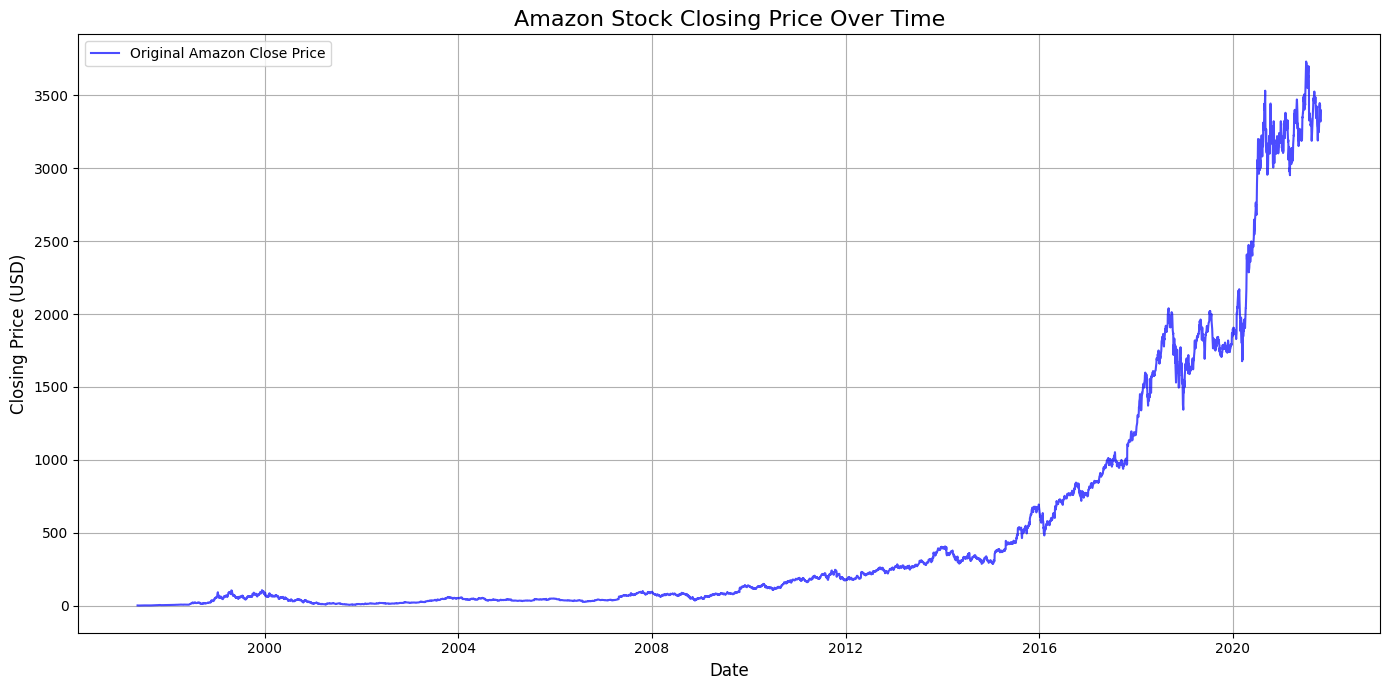


First 10 values of Rolling Mean (window=30):
Date
1997-05-15   NaN
1997-05-16   NaN
1997-05-19   NaN
1997-05-20   NaN
1997-05-21   NaN
1997-05-22   NaN
1997-05-23   NaN
1997-05-27   NaN
1997-05-28   NaN
1997-05-29   NaN
Name: Close, dtype: float64

First 20 values of Rolling Mean (window=90):
Date
1997-05-15   NaN
1997-05-16   NaN
1997-05-19   NaN
1997-05-20   NaN
1997-05-21   NaN
1997-05-22   NaN
1997-05-23   NaN
1997-05-27   NaN
1997-05-28   NaN
1997-05-29   NaN
1997-05-30   NaN
1997-06-02   NaN
1997-06-03   NaN
1997-06-04   NaN
1997-06-05   NaN
1997-06-06   NaN
1997-06-09   NaN
1997-06-10   NaN
1997-06-11   NaN
1997-06-12   NaN
Name: Close, dtype: float64


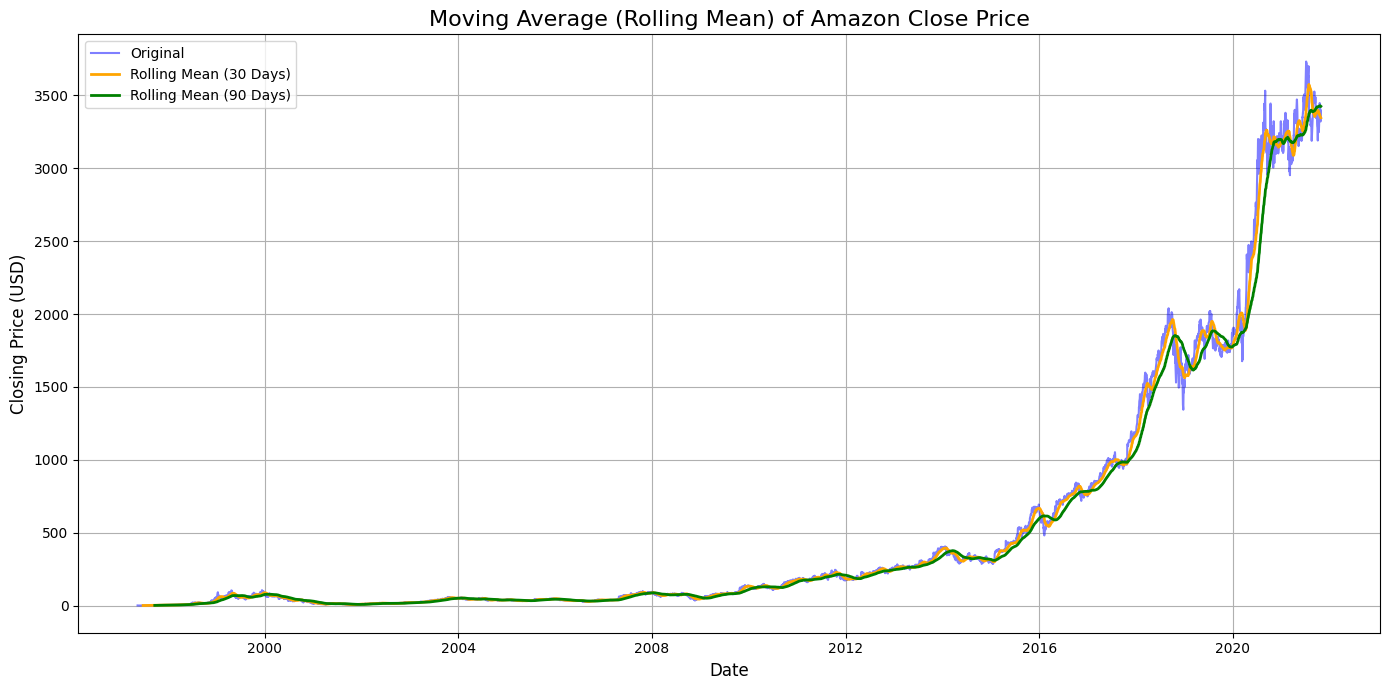

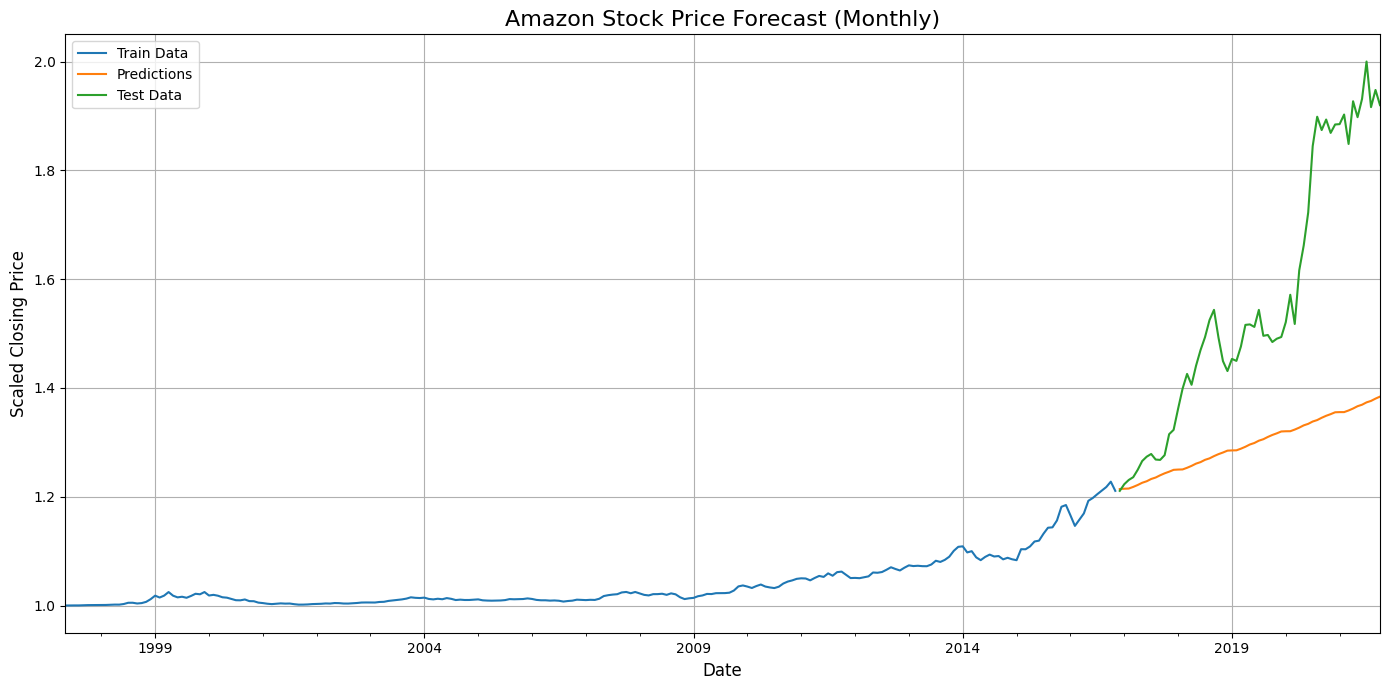


Root Mean Square Error (RMSE): 0.3221880982839411
Variance: 0.23725490998957524 Mean: 1.1434128634201857


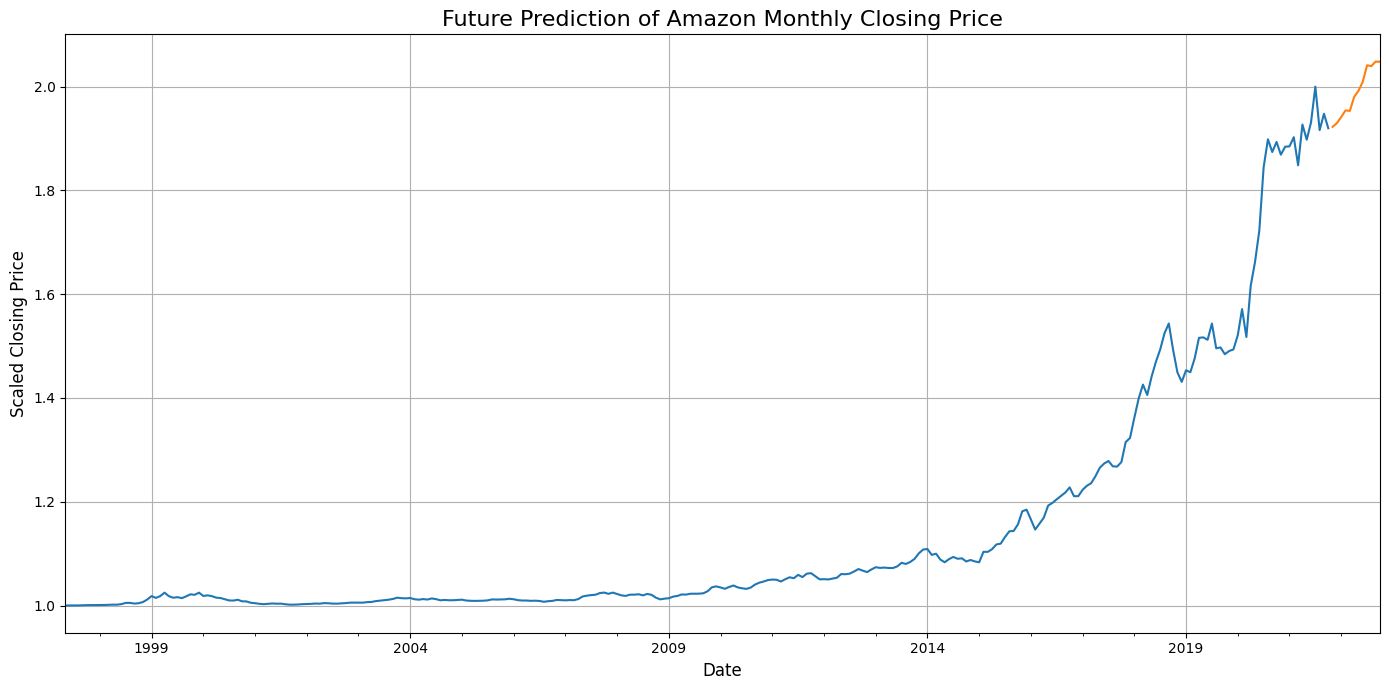

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read dataset
data = pd.read_csv("/content/Amazon.csv")

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract Close column
close_data = data[['Close']]
print("Shape of the dataset:", close_data.shape)
print("First 10 rows of the dataset:")
print(close_data.head(10))

# Plot original data
plt.figure(figsize=(14, 7))
plt.plot(close_data['Close'], label='Original Amazon Close Price', color='blue', alpha=0.7)
plt.title('Amazon Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Rolling Mean with window = 30 (monthly)
rolling_mean_30 = close_data['Close'].rolling(window=30).mean()
print("\nFirst 10 values of Rolling Mean (window=30):")
print(rolling_mean_30.head(10))

# Rolling Mean with window = 90 (quarterly)
rolling_mean_90 = close_data['Close'].rolling(window=90).mean()
print("\nFirst 20 values of Rolling Mean (window=90):")
print(rolling_mean_90.head(20))

# Plot Rolling Means
plt.figure(figsize=(14, 7))
plt.plot(close_data['Close'], label='Original', color='blue', alpha=0.5)
plt.plot(rolling_mean_30, label='Rolling Mean (30 Days)', color='orange', linewidth=2)
plt.plot(rolling_mean_90, label='Rolling Mean (90 Days)', color='green', linewidth=2)
plt.title('Moving Average (Rolling Mean) of Amazon Close Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Resample monthly and scale
close_monthly = close_data.resample('M').mean()
scaler = MinMaxScaler()
scaled_data = pd.Series(
    scaler.fit_transform(close_monthly.values.reshape(-1,1)).flatten(),
    index=close_monthly.index
)
scaled_data = scaled_data + 1

# Train-test split (80/20)
x = int(len(scaled_data) * 0.8)
train_data = scaled_data[:x]
test_data = scaled_data[x:]

# Exponential Smoothing Model
model = ExponentialSmoothing(train_data, trend='add', seasonal='mul', seasonal_periods=12).fit()
predictions = model.forecast(steps=len(test_data))

# Plot Train/Test/Predictions
ax = train_data.plot(figsize=(14,7), label="Train Data")
predictions.plot(ax=ax, label="Predictions")
test_data.plot(ax=ax, label="Test Data")
ax.set_title('Amazon Stock Price Forecast (Monthly)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Scaled Closing Price', fontsize=12)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print("\nRoot Mean Square Error (RMSE):", rmse)

# Variance and Mean
print("Variance:", np.sqrt(scaled_data.var()), "Mean:", scaled_data.mean())

# Future Forecast
model_full = ExponentialSmoothing(scaled_data, trend='add', seasonal='mul', seasonal_periods=12).fit()
future_predictions = model_full.forecast(steps=12)  # 12 months ahead

ax = scaled_data.plot(figsize=(14,7), label="Historical Monthly Close Price")
future_predictions.plot(ax=ax, label="Future Predictions")
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Scaled Closing Price', fontsize=12)
ax.set_title('Future Prediction of Amazon Monthly Closing Price', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
